## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [8]:
Male = pd.get_dummies(data['sex'],drop_first=True)
data = pd.concat([data,Male],axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [9]:
Male

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [10]:
Smoker = pd.get_dummies(data['smoker'],drop_first=True)
data = pd.concat([data,Smoker],axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [11]:
data = data.rename(columns = {'yes':'Smoker'})
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
Region = pd.get_dummies(data['region'],drop_first=True)
df = pd.concat([data,Region],axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


## Exploratory Analysis

In [15]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

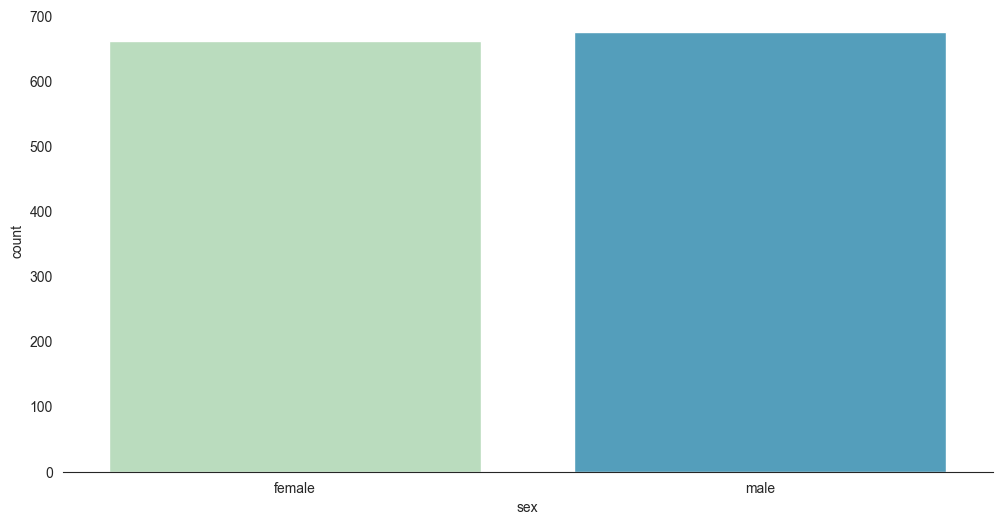

In [16]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.countplot(x='sex', data=df, hue='sex', palette='GnBu', legend=False)
sns.despine(left=True)

## Relationship of Smoking and Gender to Charges

/var/folders/m5/dq28q8qn3l58cbtzdkpby02c0000gn/T/ipykernel_6678/1505134069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex',y='charges', data=df, palette='GnBu')


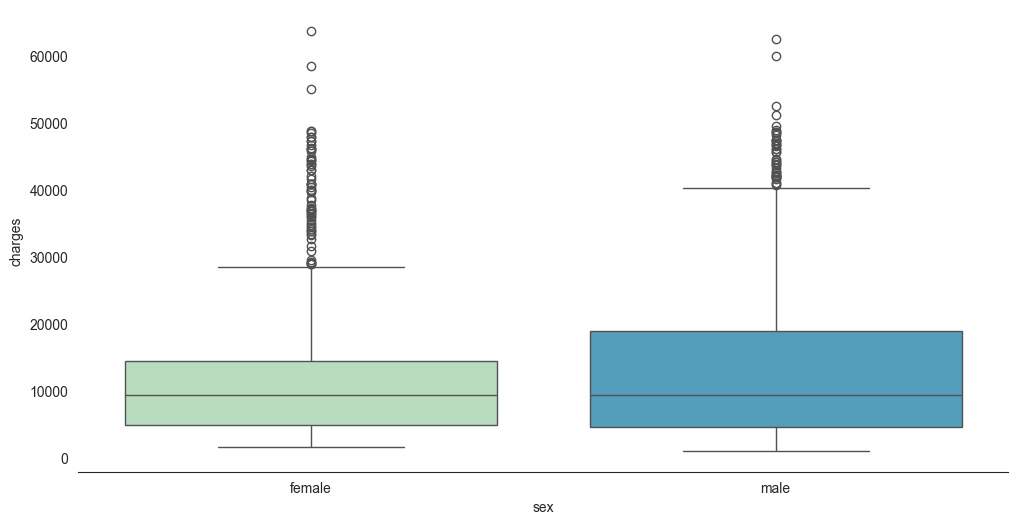

In [18]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='sex',y='charges', data=df, palette='GnBu')
sns.despine(left=True)

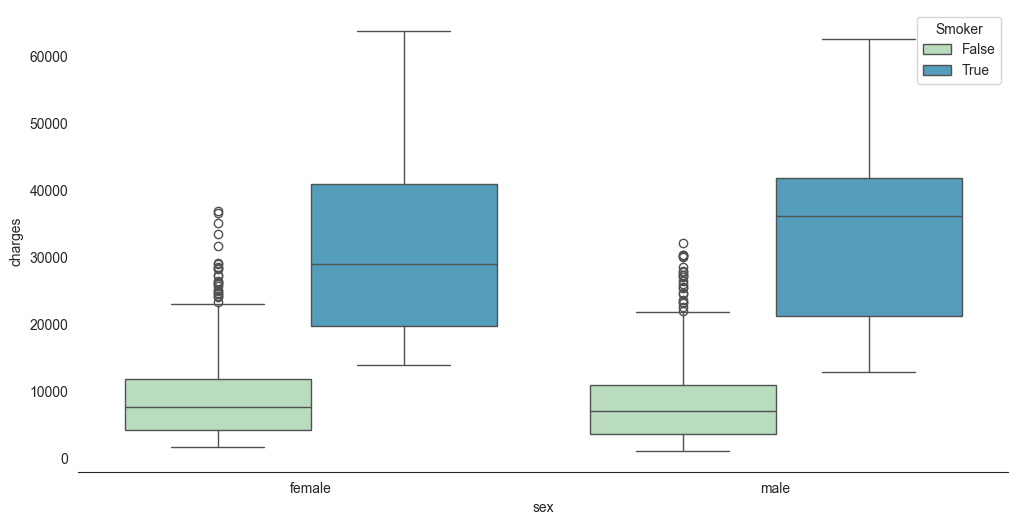

In [19]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='sex',y='charges', data=df, palette='GnBu', hue='Smoker')
sns.despine(left=True)

<Axes: xlabel='age', ylabel='charges'>

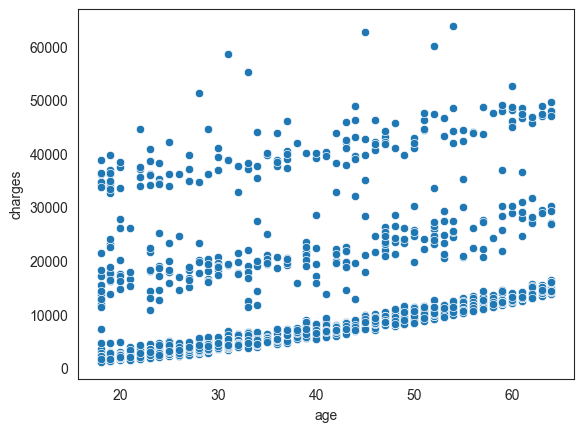

In [24]:
sns.scatterplot(x='age', y = 'charges', data= df)

<Axes: xlabel='age', ylabel='charges'>

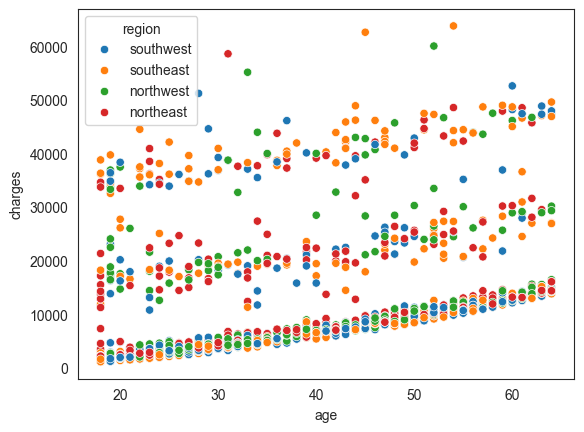

In [25]:
sns.scatterplot(x='age', y = 'charges', data= df, hue='region')

<Axes: xlabel='age', ylabel='charges'>

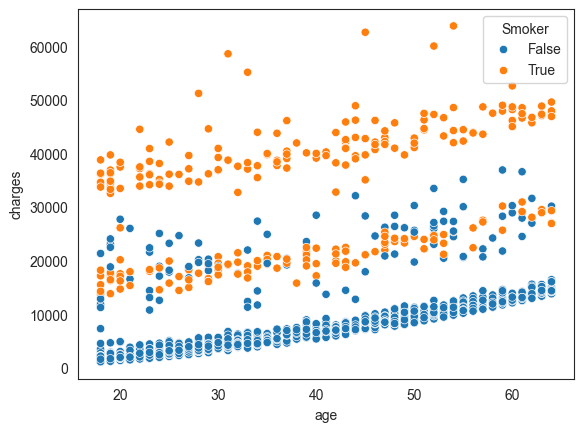

In [26]:
sns.scatterplot(x='age', y = 'charges', data= df, hue = 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

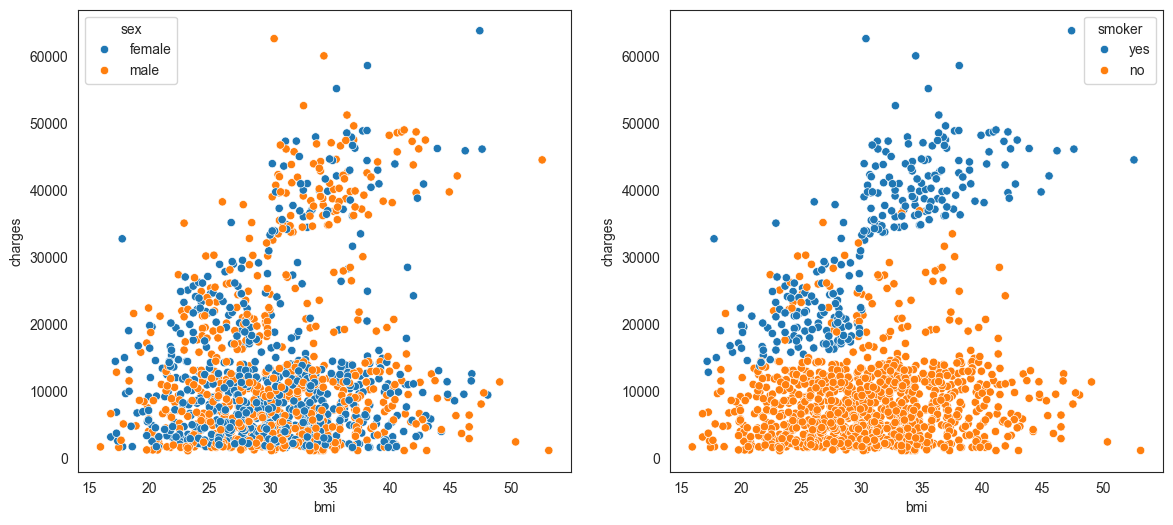

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize= (14,6))
sns.scatterplot(x='bmi', y = 'charges', data= df, hue = 'sex', ax= ax[0])
sns.scatterplot(x='bmi', y = 'charges', data= df, hue = 'smoker', ax = ax[1])

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


In [31]:
df.drop(["sex","smoker","region"],axis = 1, inplace = True)

In [32]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: >

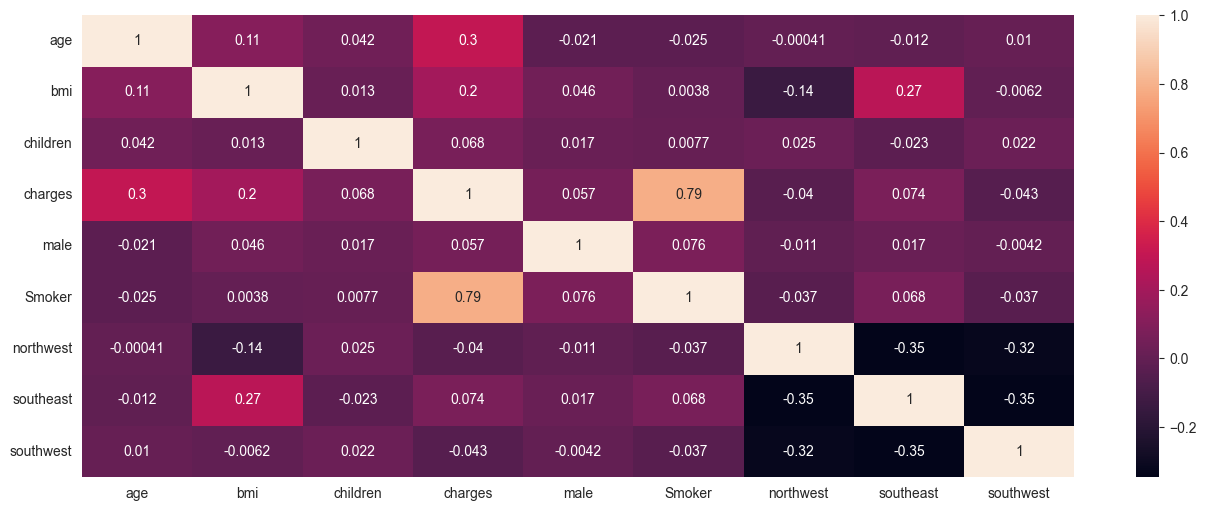

In [34]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

In [35]:
df.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## Splitting the Data

In [36]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [37]:
x.head()

,age,bmi,children,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [40]:
x_train.shape

(802, 8)

In [41]:
x_test.shape

(536, 8)

In [42]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Scaling the Data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [58]:
scaled_x_train

array([[ 1.03541113,  0.14397768, -0.88375657, ..., -0.5879095 ,
        -0.58214961,  1.79472912],
       [ 0.19279345, -0.19640291,  0.78002927, ..., -0.5879095 ,
         1.7177715 , -0.55718715],
       [-1.49244192,  3.60076735, -0.88375657, ..., -0.5879095 ,
         1.7177715 , -0.55718715],
       ...,
       [ 0.26301159,  0.80547204,  0.78002927, ..., -0.5879095 ,
        -0.58214961, -0.55718715],
       [ 0.82475671, -0.10809662, -0.05186365, ..., -0.5879095 ,
         1.7177715 , -0.55718715],
       [-1.49244192,  0.10383846,  2.4438151 , ..., -0.5879095 ,
        -0.58214961, -0.55718715]])

## Support Vector Regression model

In [59]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [60]:
predict = regressor.predict(scaled_x_test)

In [61]:
predict.shape

(536,)

In [62]:
y_test.shape

(536,)

In [63]:
predict[:10]

array([9582.05433717, 9571.10588268, 9595.69813689, 9636.10480376,
       9635.24287842, 9561.30369477, 9612.42167342, 9660.49882893,
       9601.26809521, 9560.45323709])

In [64]:
y_test[:10]

781      1146.79660
1060     1981.58190
712      8310.83915
642     13143.86485
1171    22478.60000
1158     2459.72010
658     26392.26029
338     41919.09700
445      7345.08400
102     21344.84670
Name: charges, dtype: float64